In [1]:
import pandas as pd
from pandas_ods_reader import read_ods
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
dados= pd.read_csv("Anatel.csv")

linhas= dados.index
colunas= dados.columns

Estados= dados["ESTADO"].unique()
Operadoras= dados["OPERADORA"].unique()
Glossario= dict()
Glossario["IDTNS"]= " Identificação  "
Glossario["TIPO"]= " Tipo de Serviço  "
Glossario["OPERADORA"]= "OPERADORA"
Glossario["ESTADO"]= "ESTADO"
Glossario["DATA"]="DATA"
Glossario["ANO_BASE"]="ANO_BASE"
Glossario["Q1"]="Participação da Pesquisa"
Glossario["Q2"]="Área de Trabalho"
Glossario["Q2_1"]="Área de Trabalho pós 2016 1"
Glossario["Q2_2"]="Área de Trabalho pós 2016 2"
Glossario["Q3"]="Cliente de Internet fixa"
Glossario["Q4"]="Principal Usuário"
Glossario["Q5"]="Responsável pelo Pagamento"
Glossario["Q6"]="Pessoa Física ou Jurídica"
Glossario["Q7"]="Idade"
Glossario["Q7a"]="Recusa Idade"
Glossario["Q8"]="Sexo"
Glossario["J1"]="SAT Geral"
Glossario["B1_1"]="SAT Entendimento dos Planos"
Glossario["B1_2"]="SAT Comprometimento com o prometido"
Glossario["C1_1"]="SAT Cobrança Funcionamento"
Glossario["C1_2"]="SAT Conexões sem Queda"
Glossario["C1_3"]="SAT velocidade"
Glossario["D1_1"]="SAT Cobrança Contas a Pagar "
Glossario["D1_2"]="SAT Clareza Info da Conta"
Glossario["A1_1"]="Usou atendimento telefonico ?"
Glossario["A1_2"]="Usou atendimento Internet ?"
Glossario["A1_3"]="Usou atendimento local Físico ?"
Glossario["A1_4"]="Usou atendimento ?"
Glossario["A2_1"]="SAT tempo de espera Atendimento"
Glossario["A2_2"]="SAT Necessidade Repetição"
Glossario["A2_3"]="SAT Esclarecimentos Atendentes"
Glossario["A3"]="SAT Atendimento Telefônico"
Glossario["A4"]="SAT Atendimento Internet"
Glossario["E1"]="Entrou em contato devido a problema de cobrança"
Glossario["E2"]="SAT Resolução Problema Cobrança"
Glossario["E3"]="Entrou em Contato para Alterar Plano"
Glossario["E4"]="SAT Resolução Alteração"
Glossario["E5"]="Entrou em Contato para Cancelar"
Glossario["E6"]="SAT Resolução Cancelamento"
Glossario["E7"]="Entrou em Contato para Problemas"
Glossario["E8"]="SAT a resolução do Problema"
Glossario["F1"]="Solicitou instalação de internet fixa"
Glossario["F2_1"]="SAT Solicitação de Instalação"
Glossario["F2_2"]="SAT Prazo Instalação"
Glossario["F2_3"]="SAT Qualidade Instalação"
Glossario["F3"]="Solicito reparos"
Glossario["F4_1"]="SAT Reparos"
Glossario["F4_2"]="SAT Prazo Reparos"
Glossario["F4_3"]="SAT Qualidade Reparos"
Glossario["G1"]="Existência de Outra Operadora"
Glossario["G2_1"]="Inclui TV?"
Glossario["G2_2"]="Inclui Telefonia Móvel?"
Glossario["G2_3"]="Inclui Telefone Fixo"
Glossario["H0"]="Município"
Glossario["H1"]="IBGE"
Glossario["H2"]="Quantidade de pessoas"
Glossario["H2a"]="Renda"
Glossario["H3"]="Recusa Renda"
Glossario["I1"]="H3"
Glossario["I2"]="Autorização 1"
Glossario["PESO"]="Autorização 2"
Glossario["COD_IBGE"]="PESO"

##Reshape Data

#Dados de Solicitação de Atendimento Telefônico, Online e outro
A_2_Integrate= list()

for i in linhas:
        if  dados.loc[i , "A1_4"] == 97:
            A_2_Integrate.append(0)
        elif dados.loc[i, "A1_1"] == 1 and dados.loc[i, "A1_2"] == 2 and dados.loc[i, "A1_3"] == 3:
            A_2_Integrate.append(7)
        elif dados.loc[i, "A1_1"] == 1 and dados.loc[i, "A1_2"] == 2 and np.isnan(dados.loc[i, "A1_3"]):
            A_2_Integrate.append(3)
        elif dados.loc[i, "A1_1"] == 1 and np.isnan(dados.loc[i, "A1_2"]) and np.isnan(dados.loc[i, "A1_3"]):
            A_2_Integrate.append(1)
        elif dados.loc[i, "A1_1"] == 1 and np.isnan(dados.loc[i, "A1_2"]) and dados.loc[i, "A1_3"] == 3:
            A_2_Integrate.append(5)
        elif np.isnan(dados.loc[i, "A1_1"]) and dados.loc[i, "A1_2"] == 2 and np.isnan(dados.loc[i, "A1_3"]):
            A_2_Integrate.append(2)
        elif np.isnan(dados.loc[i, "A1_1"]) and np.isnan(dados.loc[i, "A1_2"]) and dados.loc[i, "A1_3"] == 3:
            A_2_Integrate.append(4)
        elif np.isnan(dados.loc[i, "A1_1"]) and dados.loc[i, "A1_2"] == 2 and dados.loc[i, "A1_3"] == 3:
           A_2_Integrate.append(6)

Data_Reshaped = dados.copy()
Data_Reshaped.insert(26, "A_2_Integrate", A_2_Integrate)


for number, i in enumerate(Estados):
    Data_Reshaped.loc[(Data_Reshaped.ESTADO == i),'ESTADO']=number

for number, i in enumerate(Operadoras):
    Data_Reshaped.loc[(Data_Reshaped.OPERADORA == i),'OPERADORA']=  number

Data_Reshaped["ESTADO"] = Data_Reshaped["ESTADO"].astype(str).astype(int)
Data_Reshaped["OPERADORA"] = Data_Reshaped["OPERADORA"].astype(str).astype(int)

Data_Reshaped.rename(columns=Glossario, inplace=True)
##Removing Data
Data_Reshaped.drop("Área de Trabalho", inplace= True, axis = 1)
Data_Reshaped.drop("Área de Trabalho pós 2016 1", inplace= True, axis = 1)
Data_Reshaped.drop("Área de Trabalho pós 2016 2", inplace= True, axis = 1)
Data_Reshaped.drop("Cliente de Internet fixa", inplace= True, axis = 1)
Data_Reshaped.drop("Principal Usuário", inplace= True, axis = 1)
Data_Reshaped.drop("Pessoa Física ou Jurídica", inplace= True, axis = 1)
Data_Reshaped.drop("Usou atendimento telefonico ?", inplace= True, axis = 1)
Data_Reshaped.drop("Usou atendimento Internet ?", inplace= True, axis = 1)
Data_Reshaped.drop("Usou atendimento local Físico ?", inplace= True, axis = 1)
Data_Reshaped.drop("Usou atendimento ?", inplace= True, axis = 1)
Data_Reshaped.drop(" Identificação  ", inplace= True, axis = 1)
Data_Reshaped.drop(" Tipo de Serviço  ", inplace= True, axis = 1)
Data_Reshaped.drop("DATA", inplace= True, axis = 1)
Data_Reshaped.drop("PESO", inplace= True, axis = 1)
Data_Reshaped.drop("IBGE", inplace= True, axis = 1)
Data_Reshaped.drop("Autorização 1", inplace= True, axis = 1)
Data_Reshaped.drop("Autorização 2", inplace= True, axis = 1)
Data_Reshaped.drop("H3", inplace= True, axis = 1)
Data_Reshaped.drop("Participação da Pesquisa", inplace= True, axis = 1)

C:\Users\Usuario\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (54) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


[Text(0, 0.5, '10'),
 Text(0, 1.5, '9'),
 Text(0, 2.5, '8'),
 Text(0, 3.5, '7'),
 Text(0, 4.5, '6'),
 Text(0, 5.5, '5'),
 Text(0, 6.5, '4'),
 Text(0, 7.5, '3'),
 Text(0, 8.5, '2'),
 Text(0, 9.5, '1'),
 Text(0, 10.5, '0')]

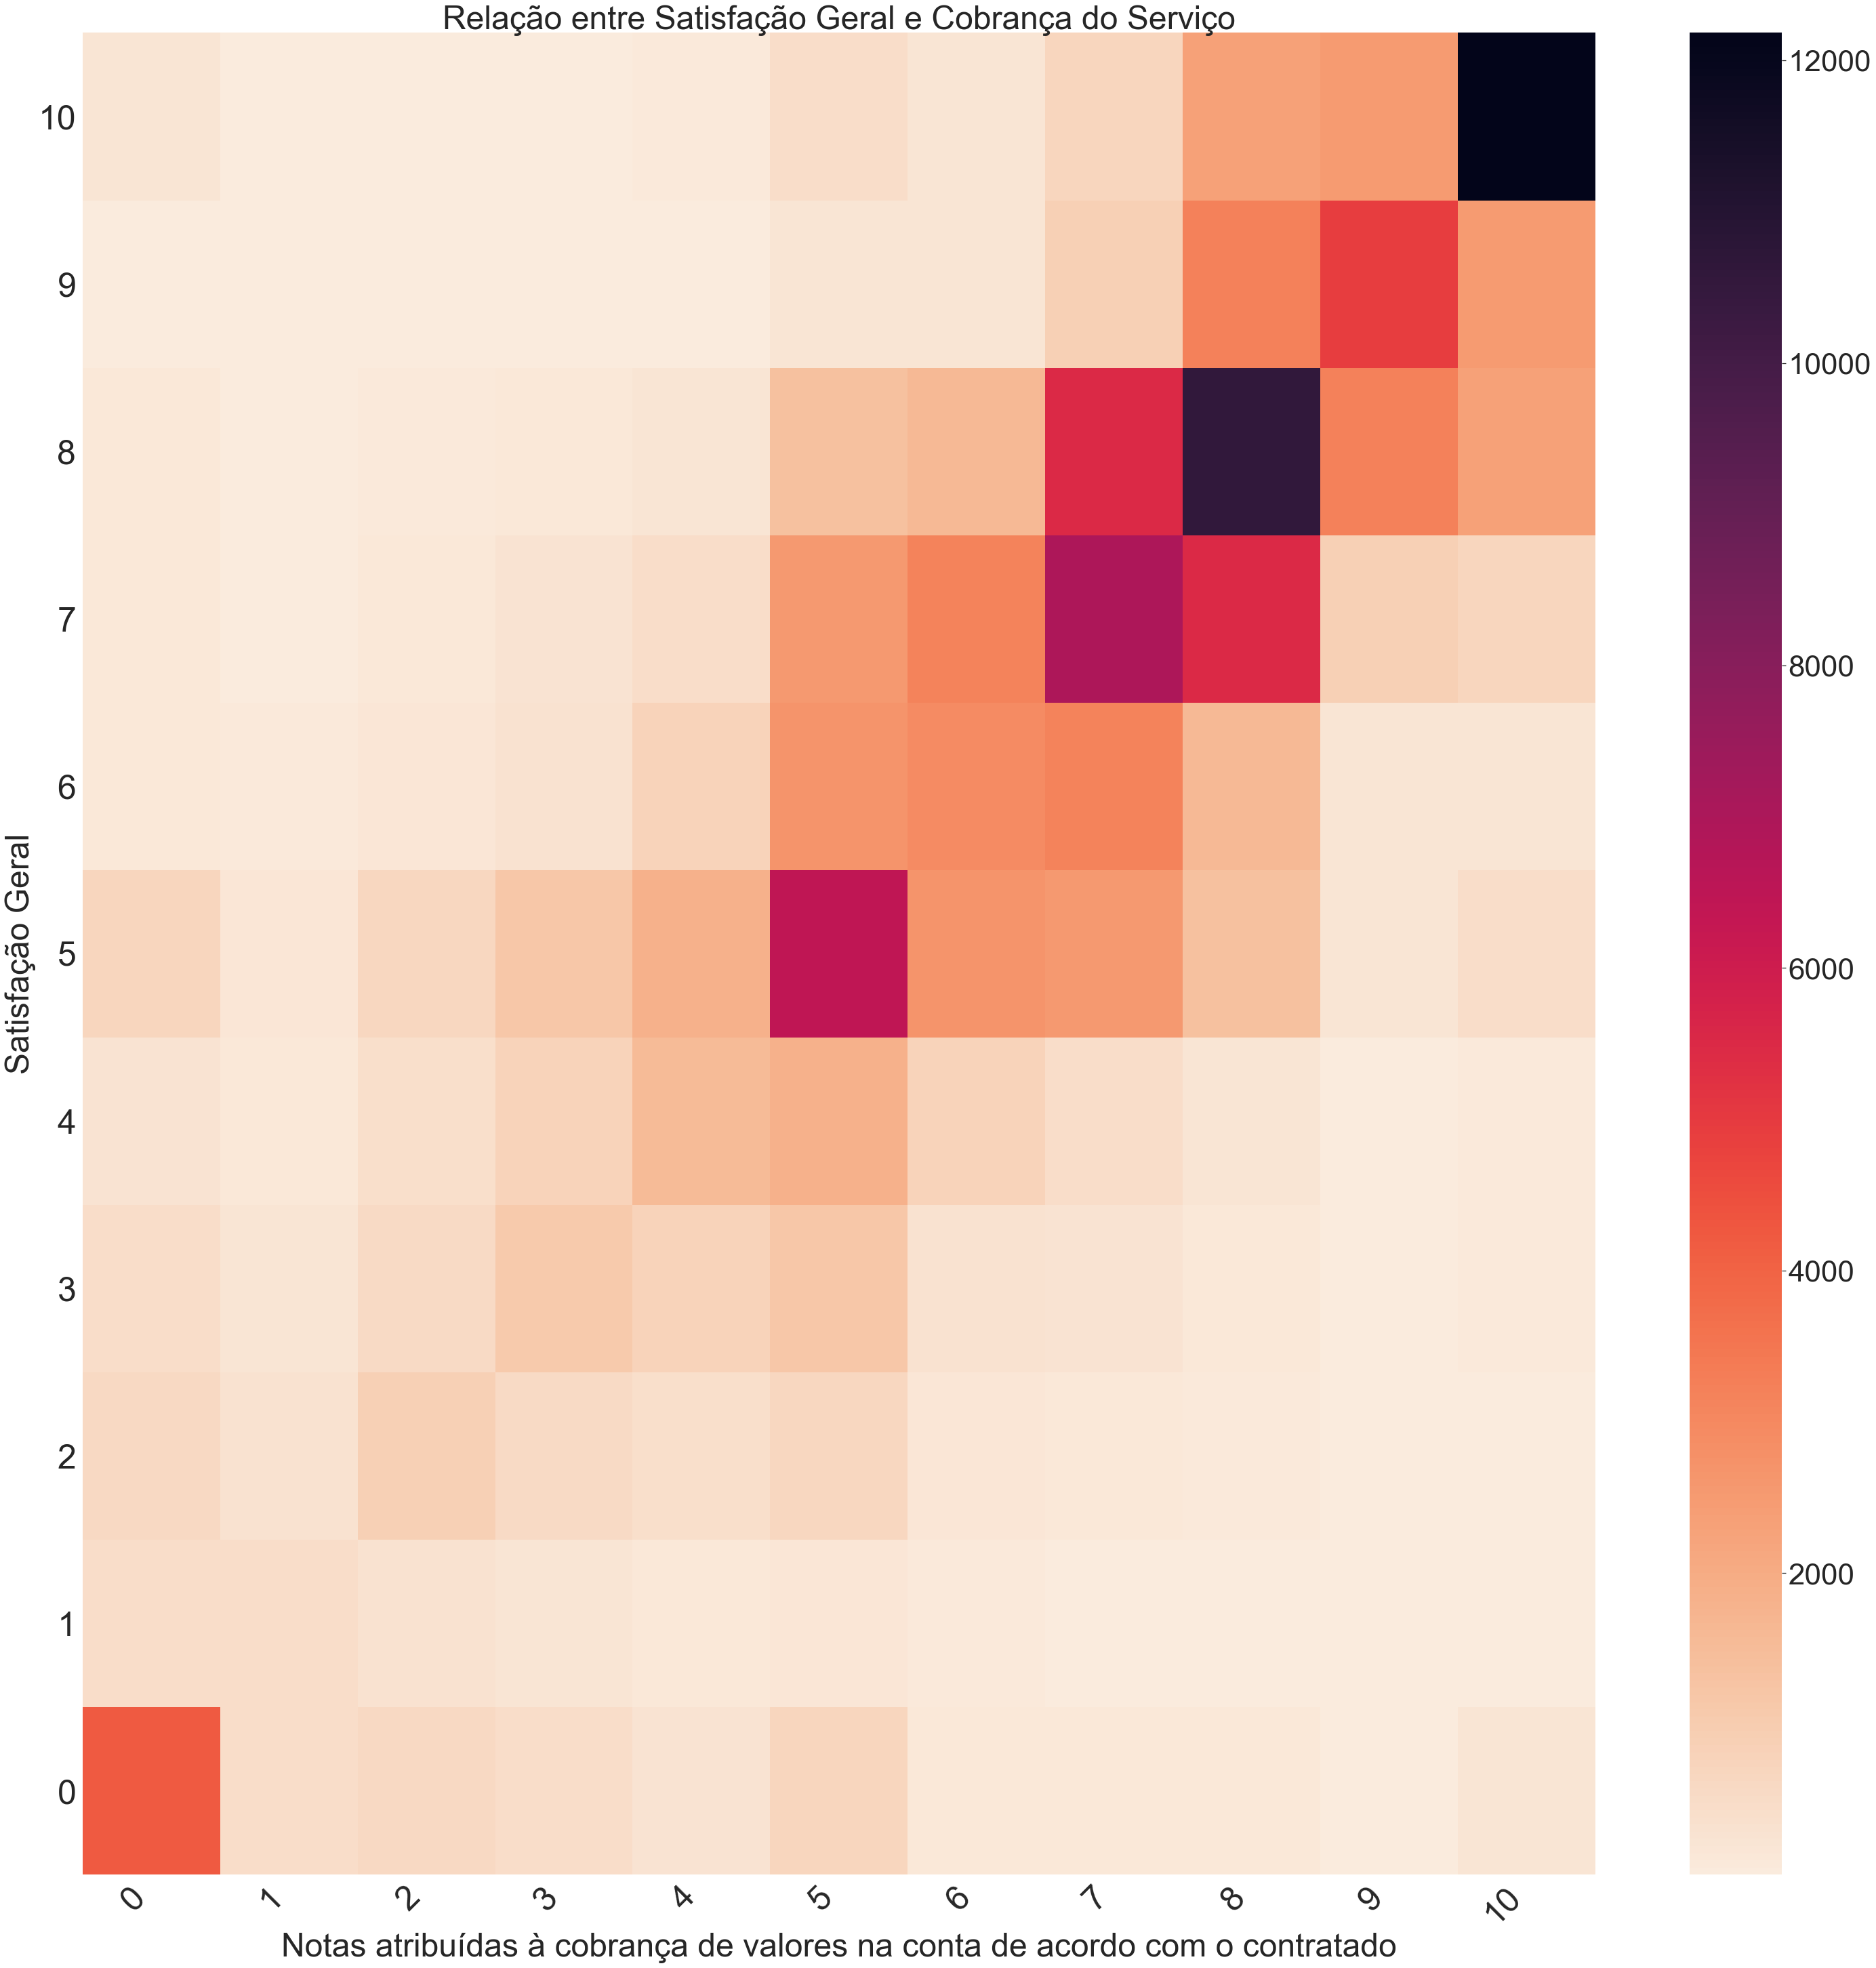

In [9]:
##HeatMAP SAT Cobrança x Sat Geral

SatCobran= Data_Reshaped["SAT Cobrança Funcionamento"]
SatGeral = Data_Reshaped["SAT Geral"]

Matrix_Geral_Cobran = np.zeros((11, 11))

for idx in SatGeral.index:
    j = SatGeral.loc[idx]
    i = SatCobran.loc[idx]
    if (i <= 10) and (j<=10):
        Matrix_Geral_Cobran[j,i] = Matrix_Geral_Cobran[i,j] + 1
Matriz = pd.DataFrame(Matrix_Geral_Cobran)
Matriz = Matriz.sort_index(ascending = False)

f, ax = plt.subplots(figsize=(50, 50))
cmap = sns.color_palette("rocket_r", as_cmap=True)
sns.heatmap(Matriz, cmap=cmap, annot_kws={"fontsize":50})
sns.set(font_scale=4)
plt.title("Relação entre Satisfação Geral e Cobrança do Serviço")
plt.xlabel("Notas atribuídas à cobrança de valores na conta de acordo com o contratado")
plt.ylabel ("Satisfação Geral")
ax.set_xticklabels(
    ax.get_xticklabels(),
    size = 50,
    rotation=45,
    horizontalalignment='right'
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    size = 50,
    rotation=0,
    horizontalalignment='right'
)

[Text(0, 0.5, '10'),
 Text(0, 1.5, '9'),
 Text(0, 2.5, '8'),
 Text(0, 3.5, '7'),
 Text(0, 4.5, '6'),
 Text(0, 5.5, '5'),
 Text(0, 6.5, '4'),
 Text(0, 7.5, '3'),
 Text(0, 8.5, '2'),
 Text(0, 9.5, '1'),
 Text(0, 10.5, '0')]

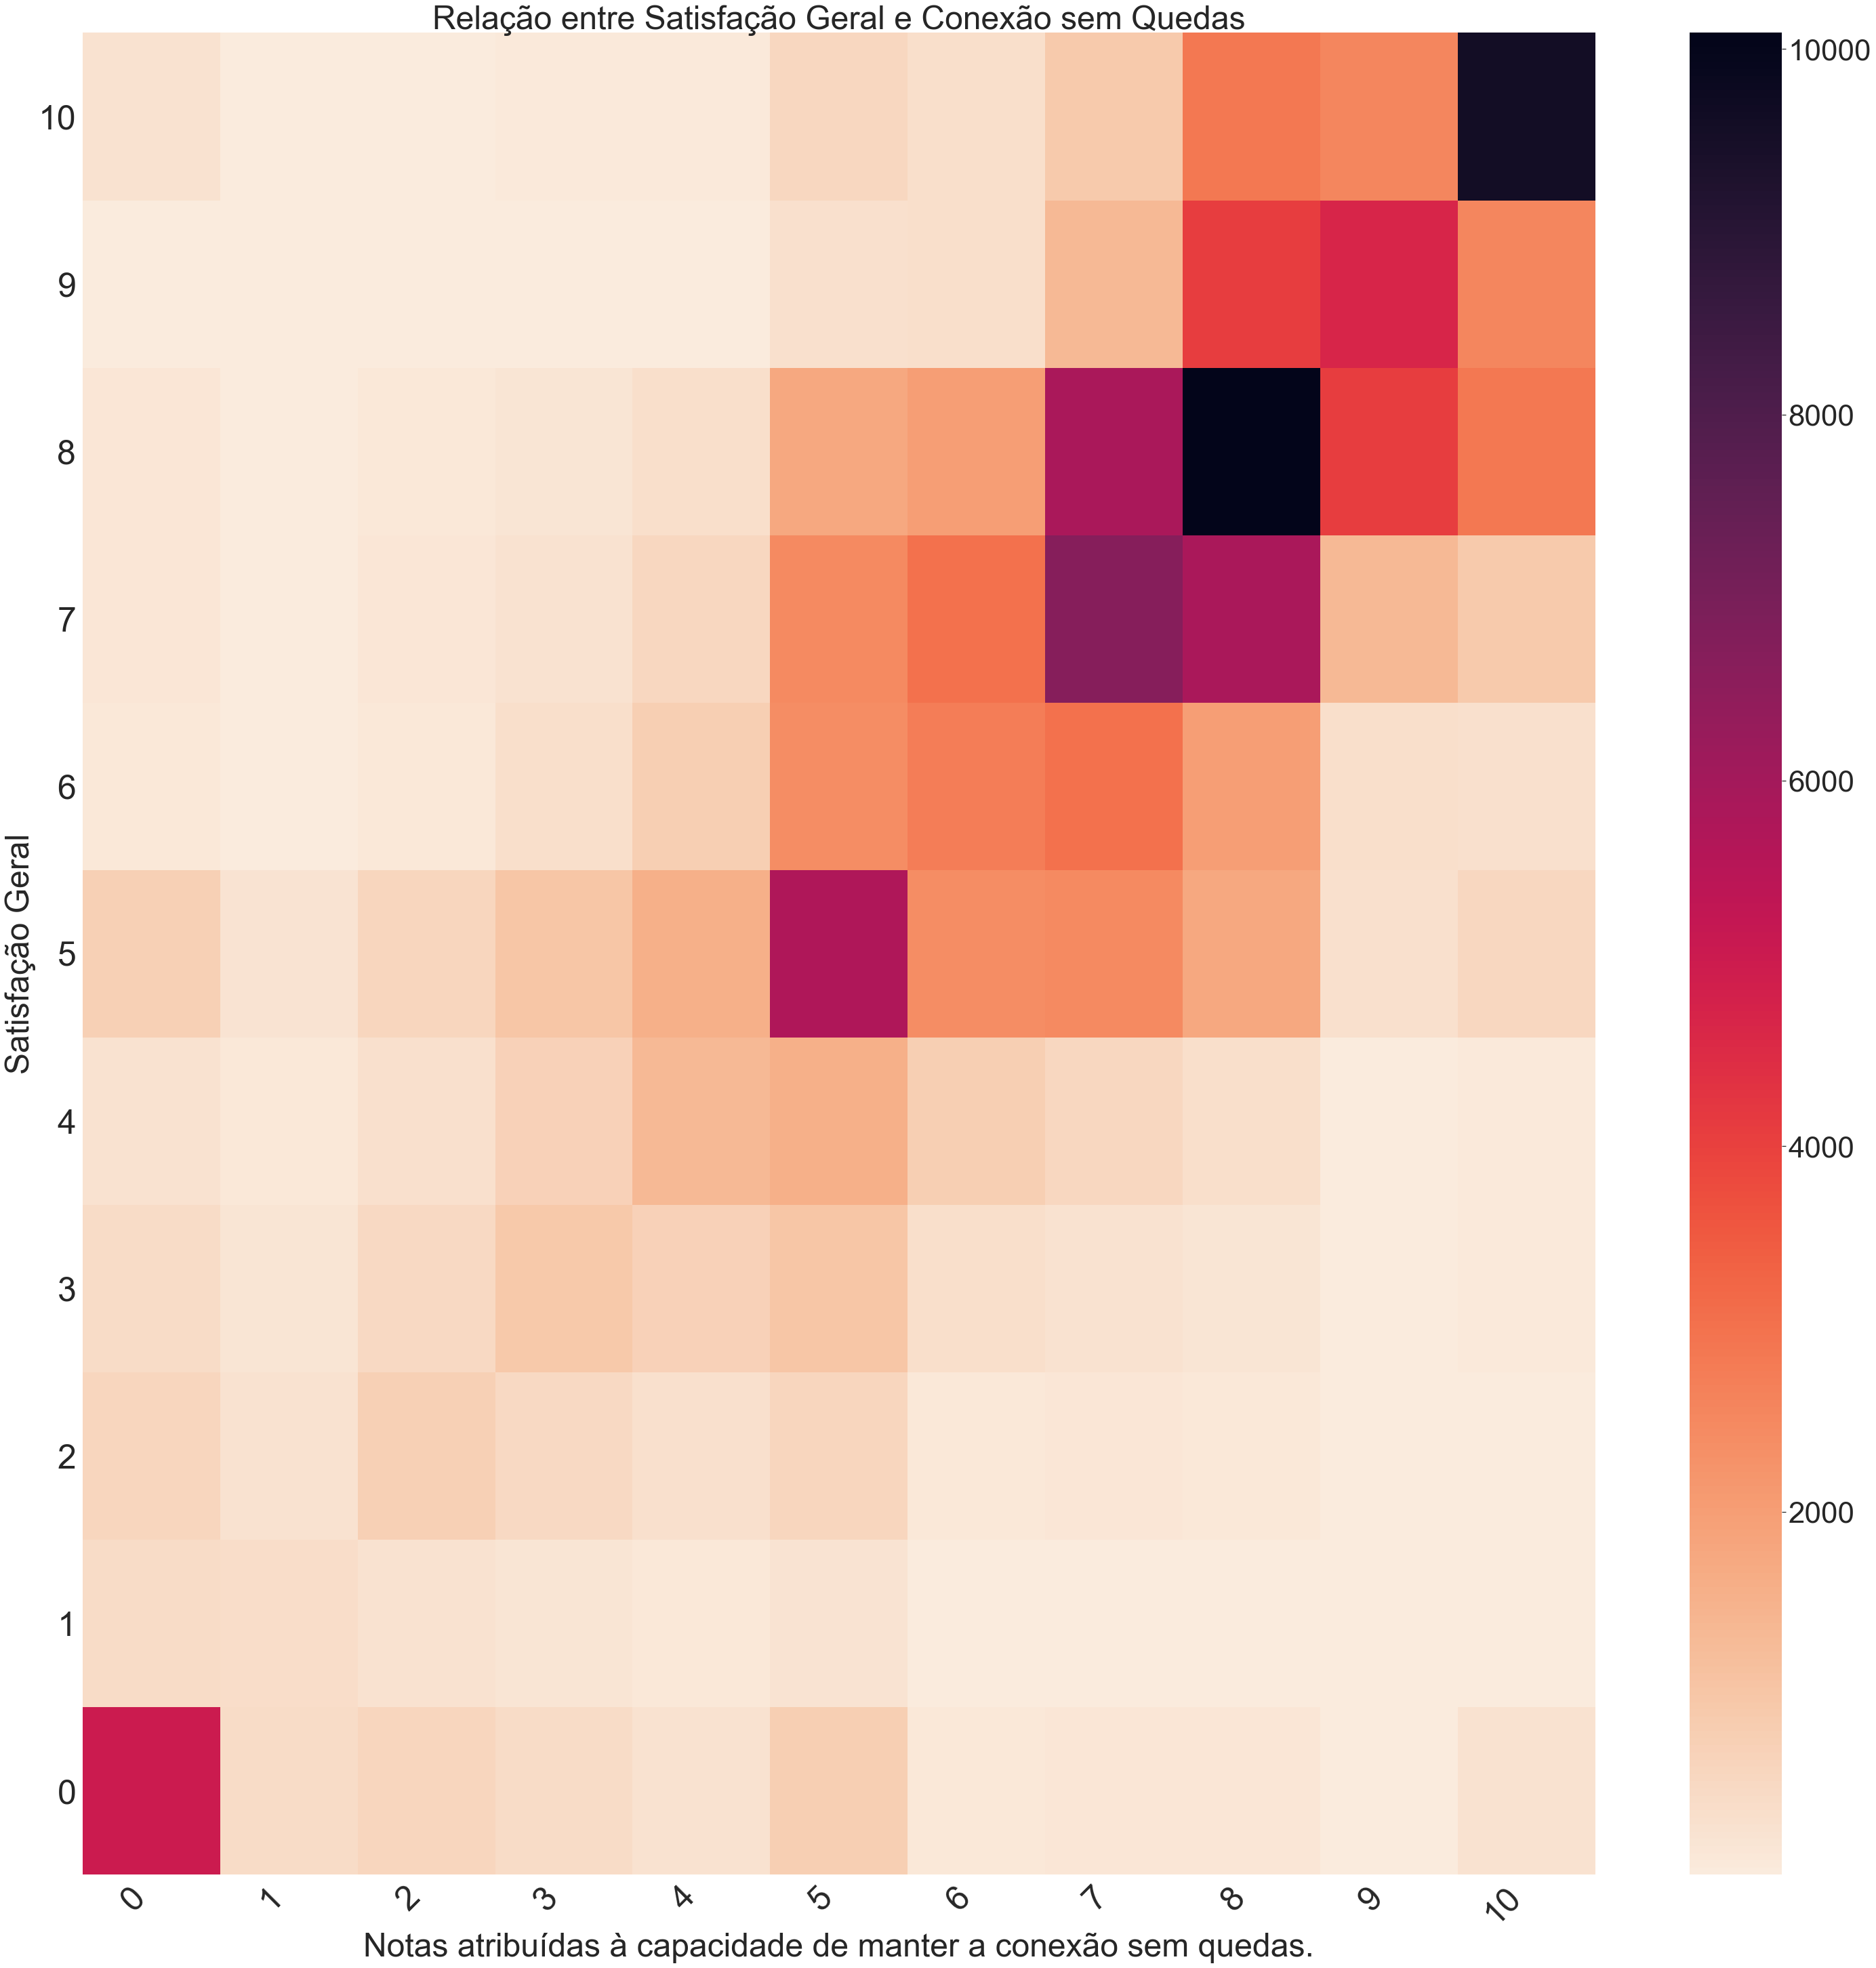

In [8]:
##HeatMAP SAT Cobrança x Sat Geral

SatQueda= Data_Reshaped["SAT Conexões sem Queda"]
SatGeral = Data_Reshaped["SAT Geral"]

Matrix_Geral_Cobran = np.zeros((11, 11))

for idx in SatGeral.index:
    j = SatGeral.loc[idx]
    i = SatQueda.loc[idx]
    if (i <= 10) and (j<=10):
        Matrix_Geral_Cobran[j,i] = Matrix_Geral_Cobran[i,j] + 1
Matriz = pd.DataFrame(Matrix_Geral_Cobran)
Matriz = Matriz.sort_index(ascending = False)

f, ax = plt.subplots(figsize=(50, 50))
cmap = sns.color_palette("rocket_r", as_cmap=True)
sns.heatmap(Matriz, cmap=cmap, annot_kws={"fontsize":50})
sns.set(font_scale=4)
plt.title("Relação entre Satisfação Geral e Conexão sem Quedas")
plt.xlabel("Notas atribuídas à capacidade de manter a conexão sem quedas.")
plt.ylabel ("Satisfação Geral")
ax.set_xticklabels(
    ax.get_xticklabels(),
    size = 50,
    rotation=45,
    horizontalalignment='right'
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    size = 50,
    rotation=0,
    horizontalalignment='right'
)

[Text(0, 0.5, '10'),
 Text(0, 1.5, '9'),
 Text(0, 2.5, '8'),
 Text(0, 3.5, '7'),
 Text(0, 4.5, '6'),
 Text(0, 5.5, '5'),
 Text(0, 6.5, '4'),
 Text(0, 7.5, '3'),
 Text(0, 8.5, '2'),
 Text(0, 9.5, '1'),
 Text(0, 10.5, '0')]

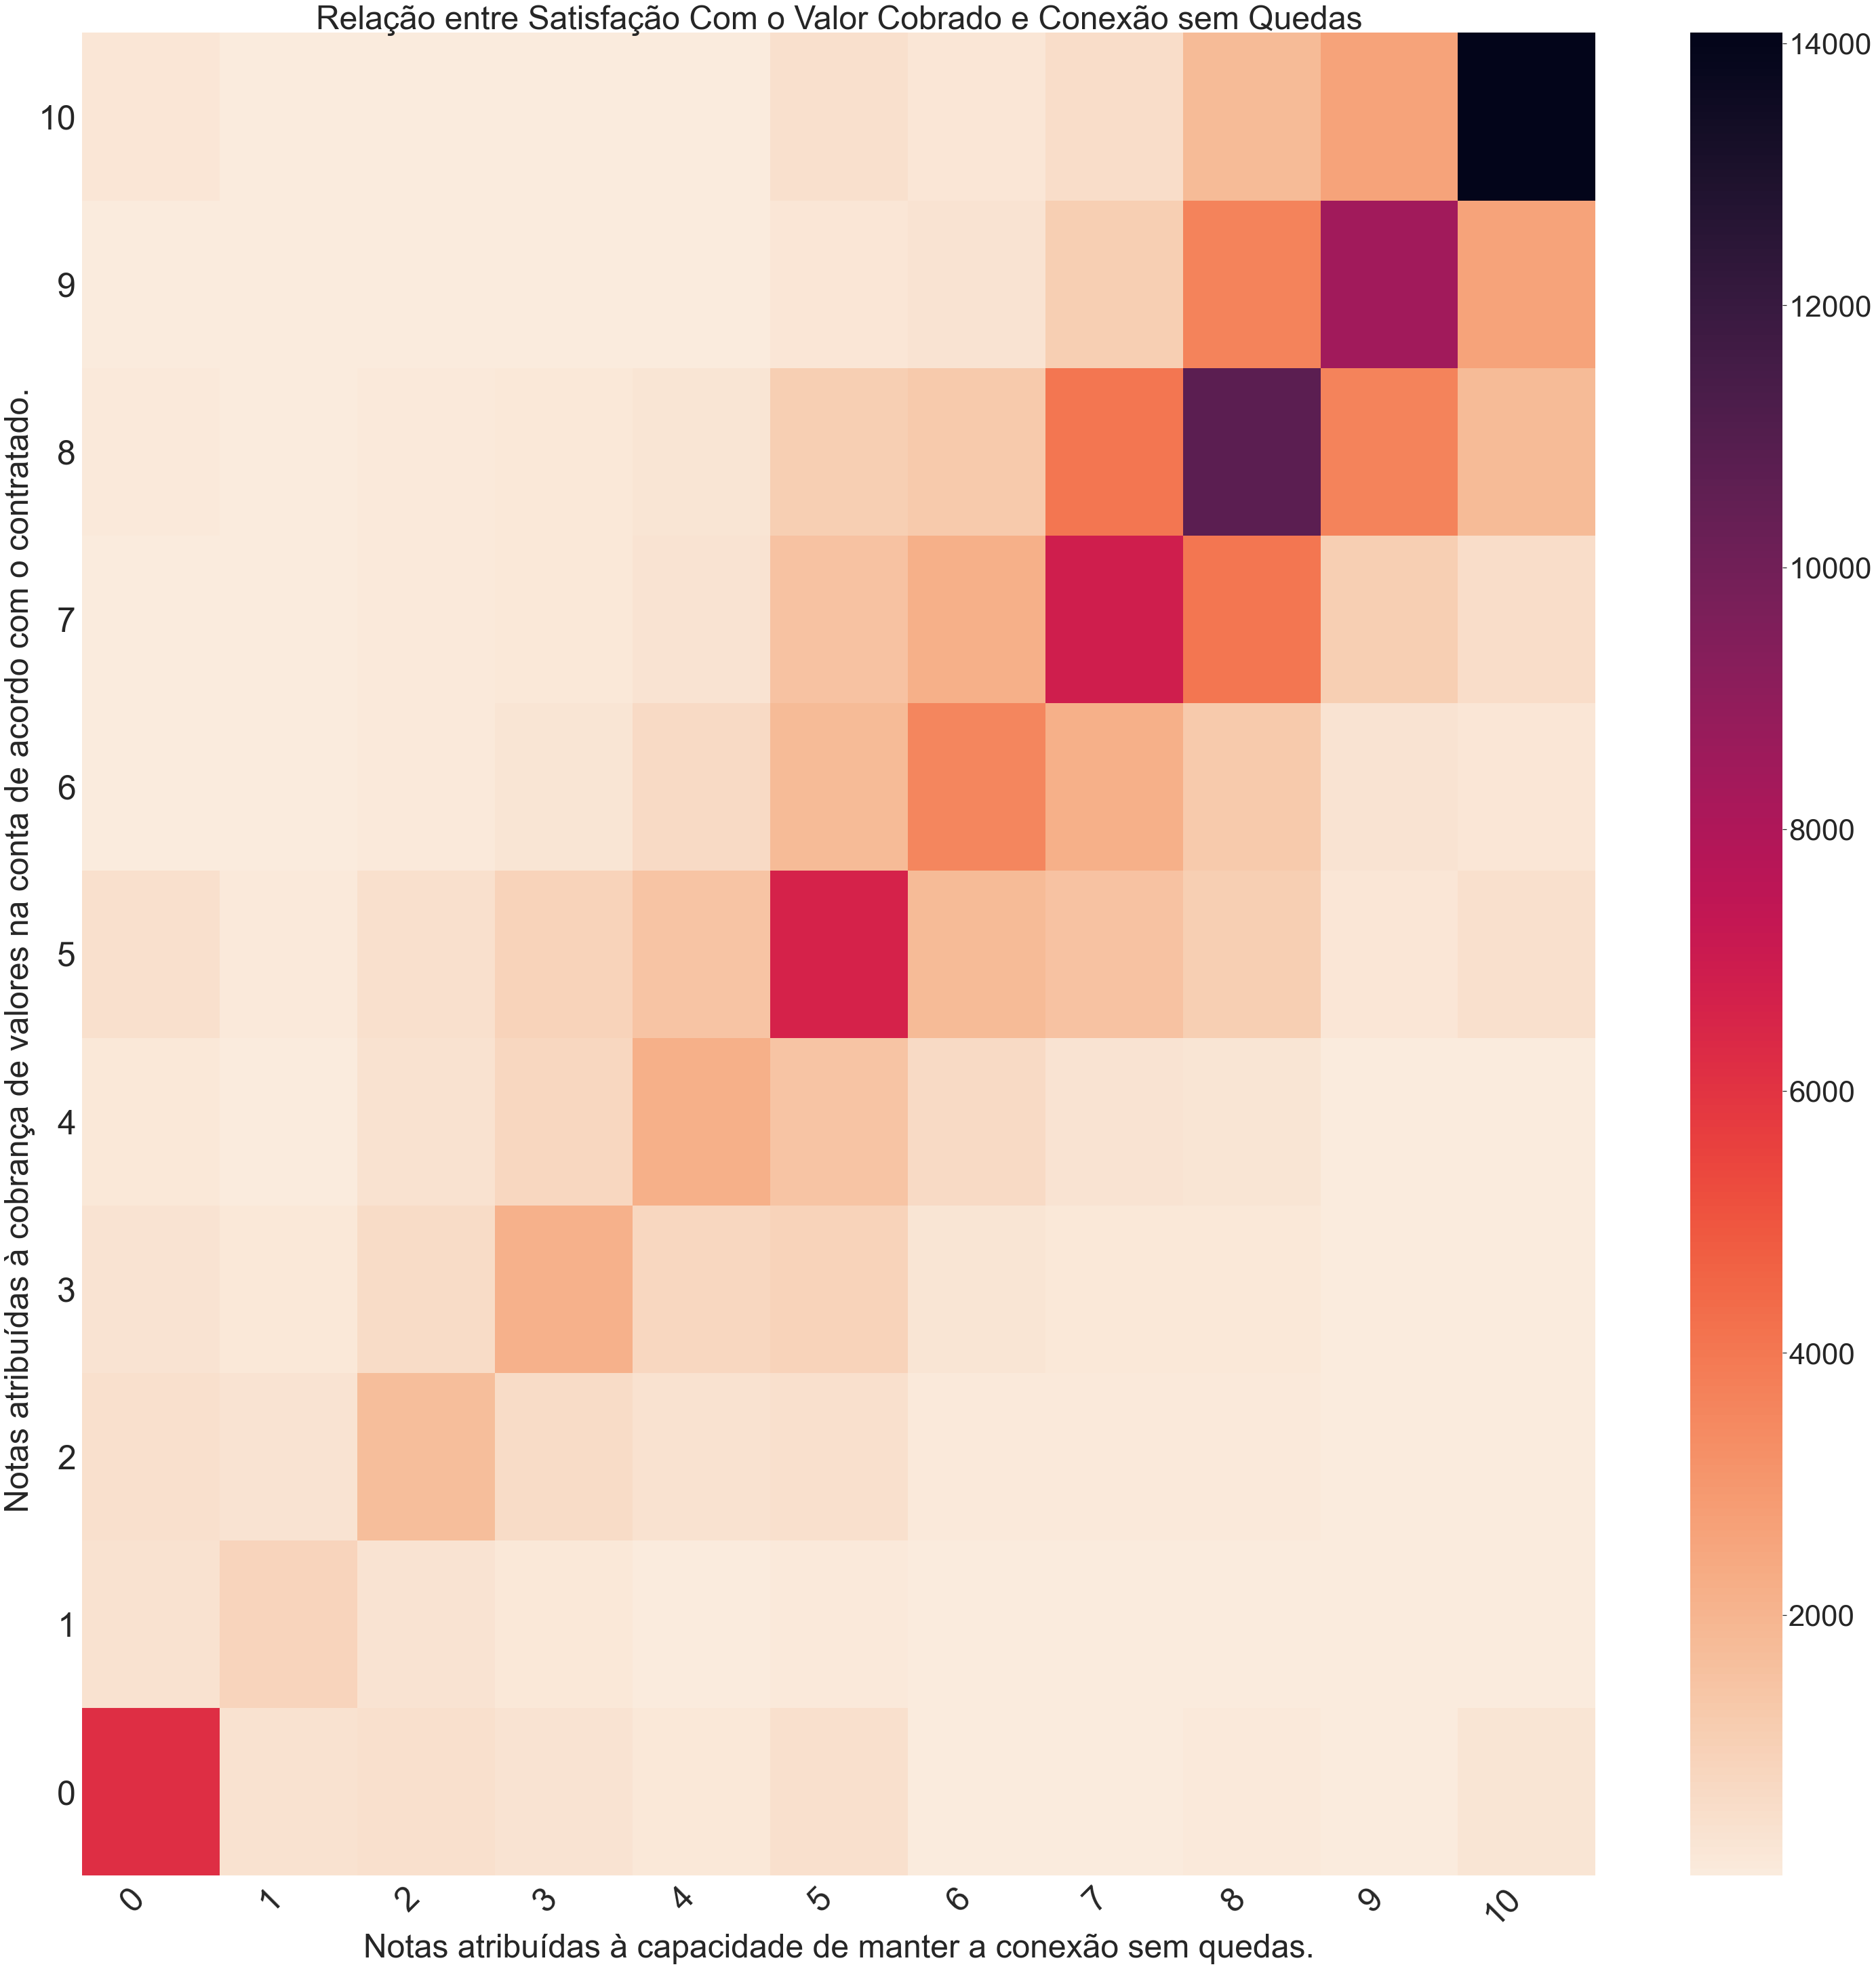

In [7]:
SatQueda= Data_Reshaped["SAT Cobrança Funcionamento"]
SatGeral = Data_Reshaped["SAT Conexões sem Queda"]

Matrix_Geral_Cobran = np.zeros((11, 11))

for idx in SatGeral.index:
    j = SatGeral.loc[idx]
    i = SatQueda.loc[idx]
    if (i <= 10) and (j<=10):
        Matrix_Geral_Cobran[j,i] = Matrix_Geral_Cobran[i,j] + 1
Matriz = pd.DataFrame(Matrix_Geral_Cobran)
Matriz = Matriz.sort_index(ascending = False)

f, ax = plt.subplots(figsize=(50, 50))
cmap = sns.color_palette("rocket_r", as_cmap=True)
sns.heatmap(Matriz, cmap=cmap, annot_kws={"fontsize":50})
sns.set(font_scale=4)
plt.title("Relação entre Satisfação Com o Valor Cobrado e Conexão sem Quedas")
plt.xlabel("Notas atribuídas à capacidade de manter a conexão sem quedas.")
plt.ylabel (" Notas atribuídas à cobrança de valores na conta de acordo com o contratado.")
ax.set_xticklabels(
    ax.get_xticklabels(),
    size = 50,
    rotation=45,
    horizontalalignment='right'
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    size = 50,
    rotation=0,
    horizontalalignment='right'
)

[Text(0, 0.5, '10'),
 Text(0, 1.5, '9'),
 Text(0, 2.5, '8'),
 Text(0, 3.5, '7'),
 Text(0, 4.5, '6'),
 Text(0, 5.5, '5'),
 Text(0, 6.5, '4'),
 Text(0, 7.5, '3'),
 Text(0, 8.5, '2'),
 Text(0, 9.5, '1'),
 Text(0, 10.5, '0')]

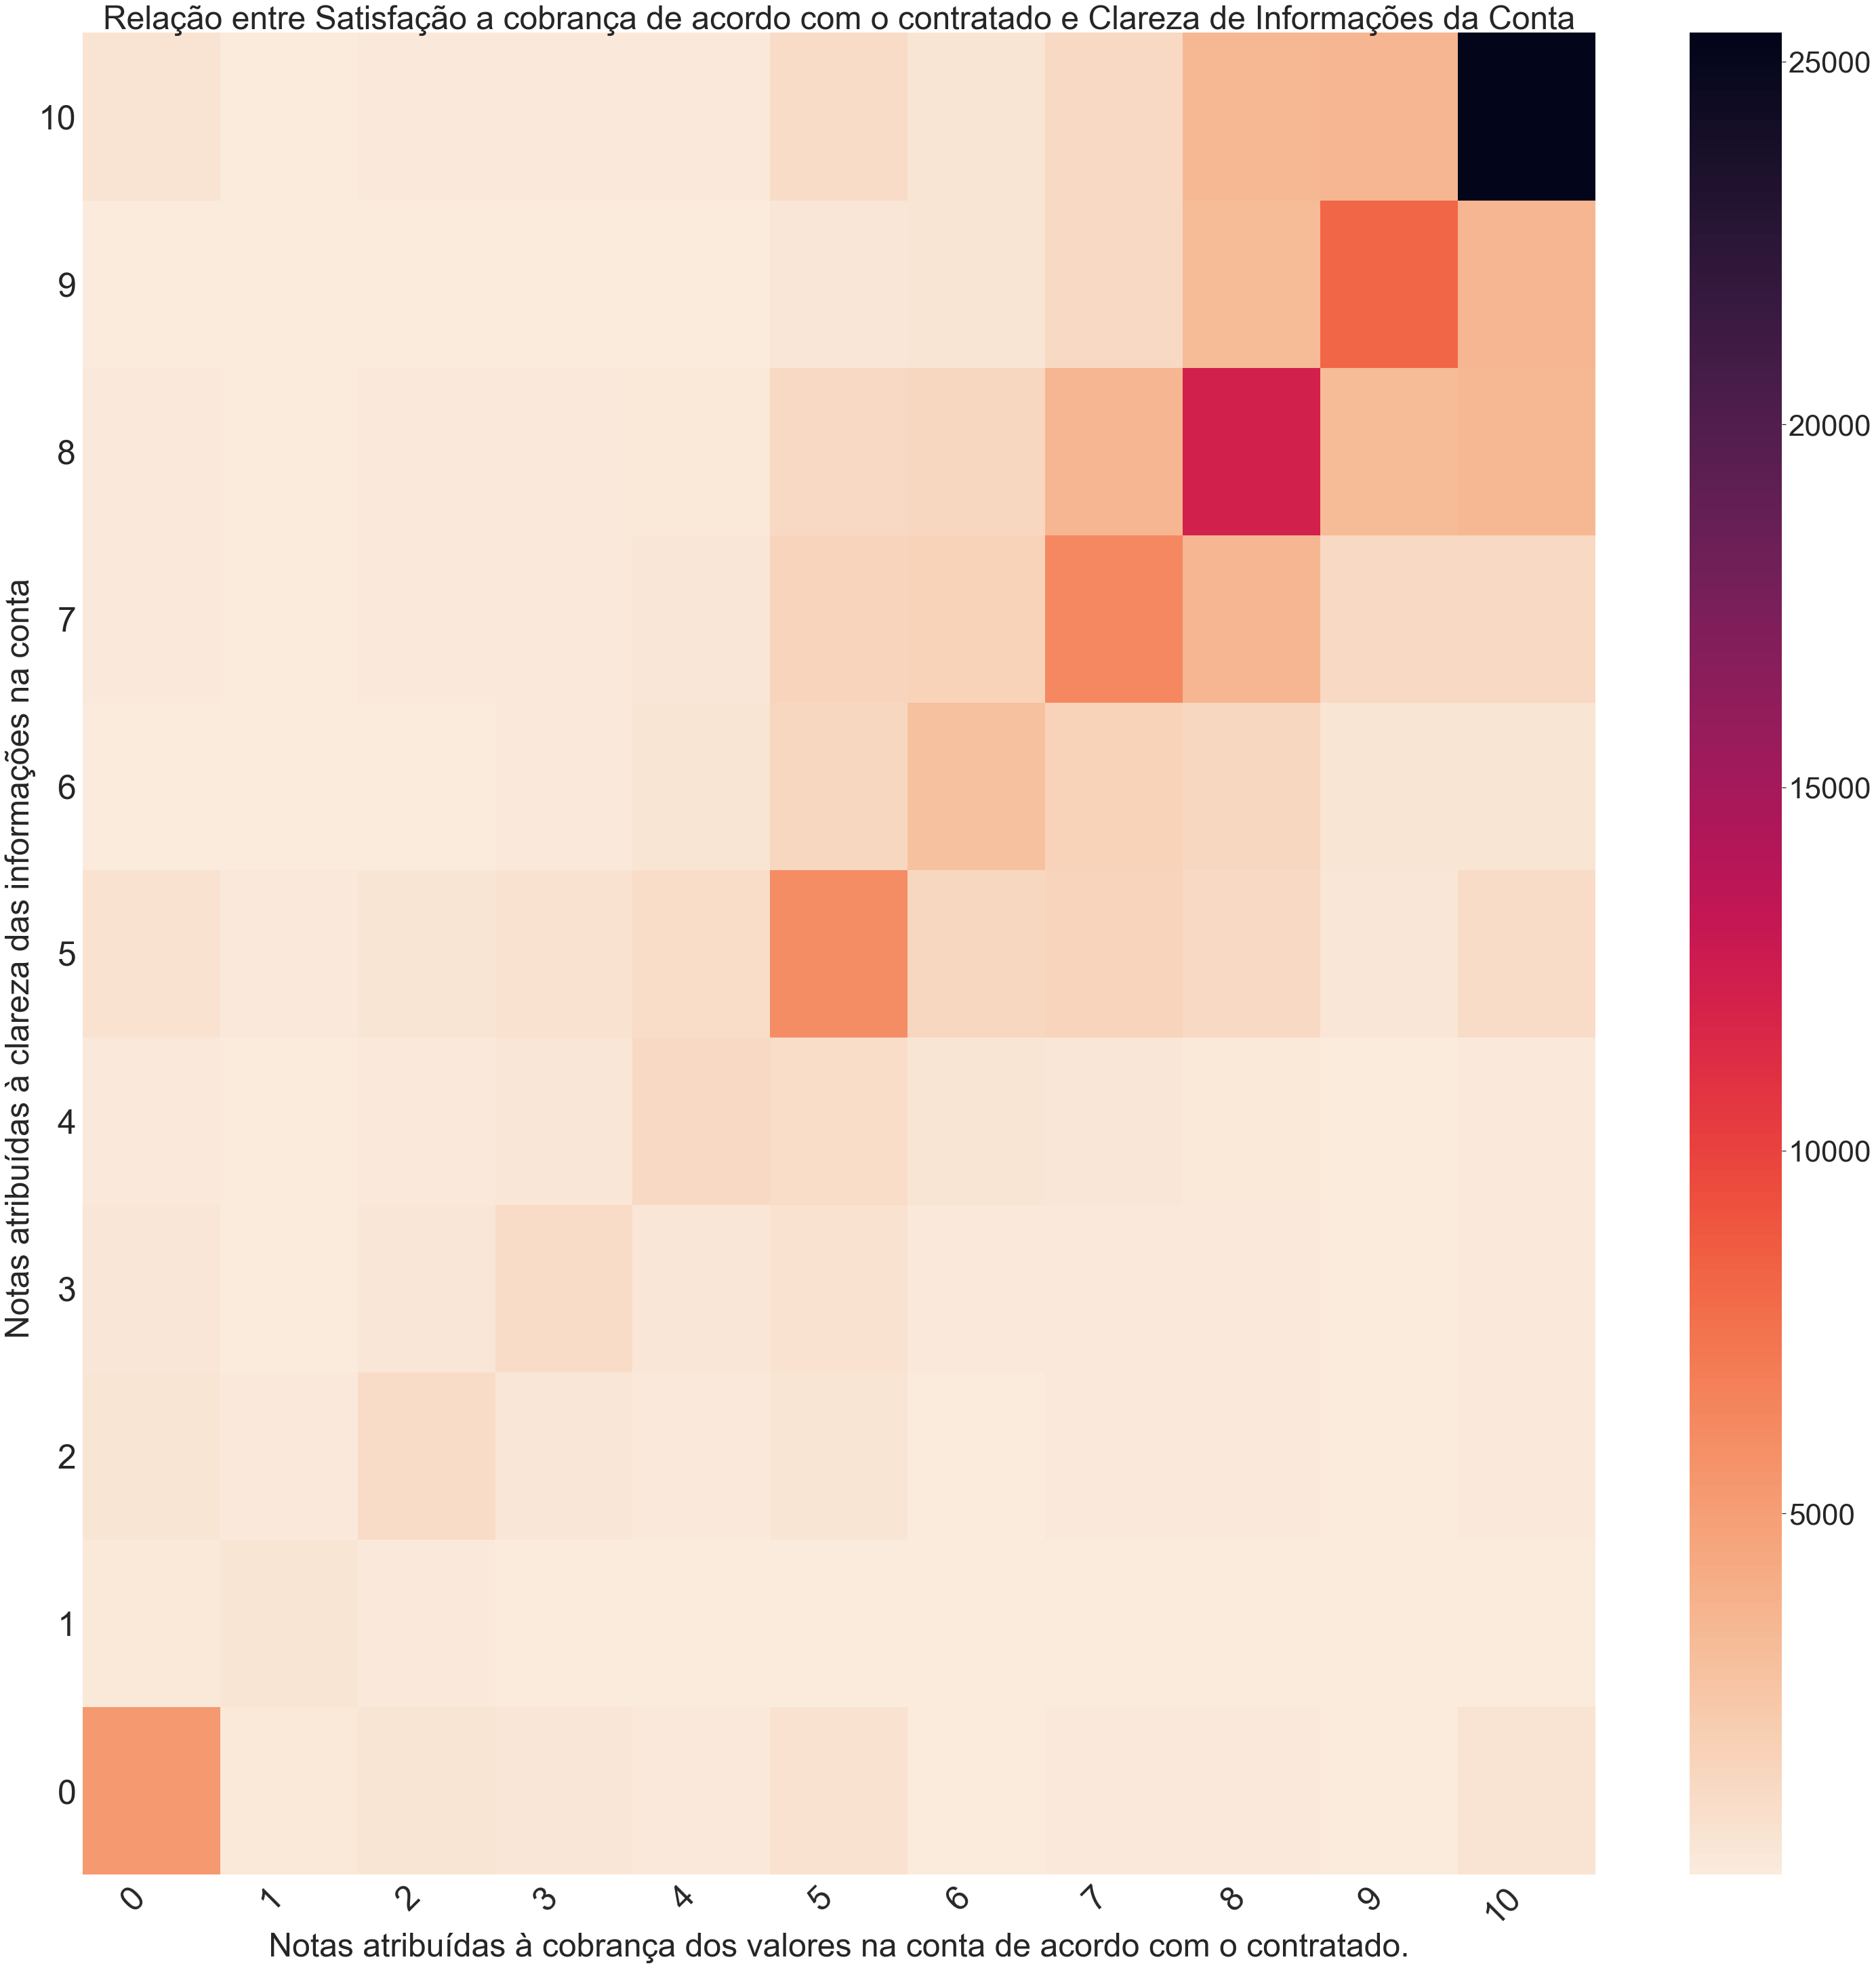

In [6]:
SatQueda= Data_Reshaped["SAT Cobrança Contas a Pagar "]
SatGeral = Data_Reshaped["SAT Clareza Info da Conta"]

Matrix_Geral_Cobran = np.zeros((11, 11))

for idx in SatGeral.index:
    j = SatGeral.loc[idx]
    i = SatQueda.loc[idx]
    if (i <= 10) and (j<=10):
        Matrix_Geral_Cobran[j,i] = Matrix_Geral_Cobran[i,j] + 1
Matriz = pd.DataFrame(Matrix_Geral_Cobran)
Matriz = Matriz.sort_index(ascending = False)

f, ax = plt.subplots(figsize=(50, 50))
cmap = sns.color_palette("rocket_r", as_cmap=True)
sns.heatmap(Matriz, cmap=cmap, annot_kws={"fontsize":50})
sns.set(font_scale=4)
plt.title("Relação entre Satisfação a cobrança de acordo com o contratado e Clareza de Informações da Conta")
plt.xlabel(" Notas atribuídas à cobrança dos valores na conta de acordo com o contratado. ")
plt.ylabel ("Notas atribuídas à clareza das informações na conta ")
ax.set_xticklabels(
    ax.get_xticklabels(),
    size = 50,
    rotation=45,
    horizontalalignment='right'
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    size = 50,
    rotation=0,
    horizontalalignment='right'
)

[Text(0, 0.5, '10'),
 Text(0, 1.5, '9'),
 Text(0, 2.5, '8'),
 Text(0, 3.5, '7'),
 Text(0, 4.5, '6'),
 Text(0, 5.5, '5'),
 Text(0, 6.5, '4'),
 Text(0, 7.5, '3'),
 Text(0, 8.5, '2'),
 Text(0, 9.5, '1'),
 Text(0, 10.5, '0')]

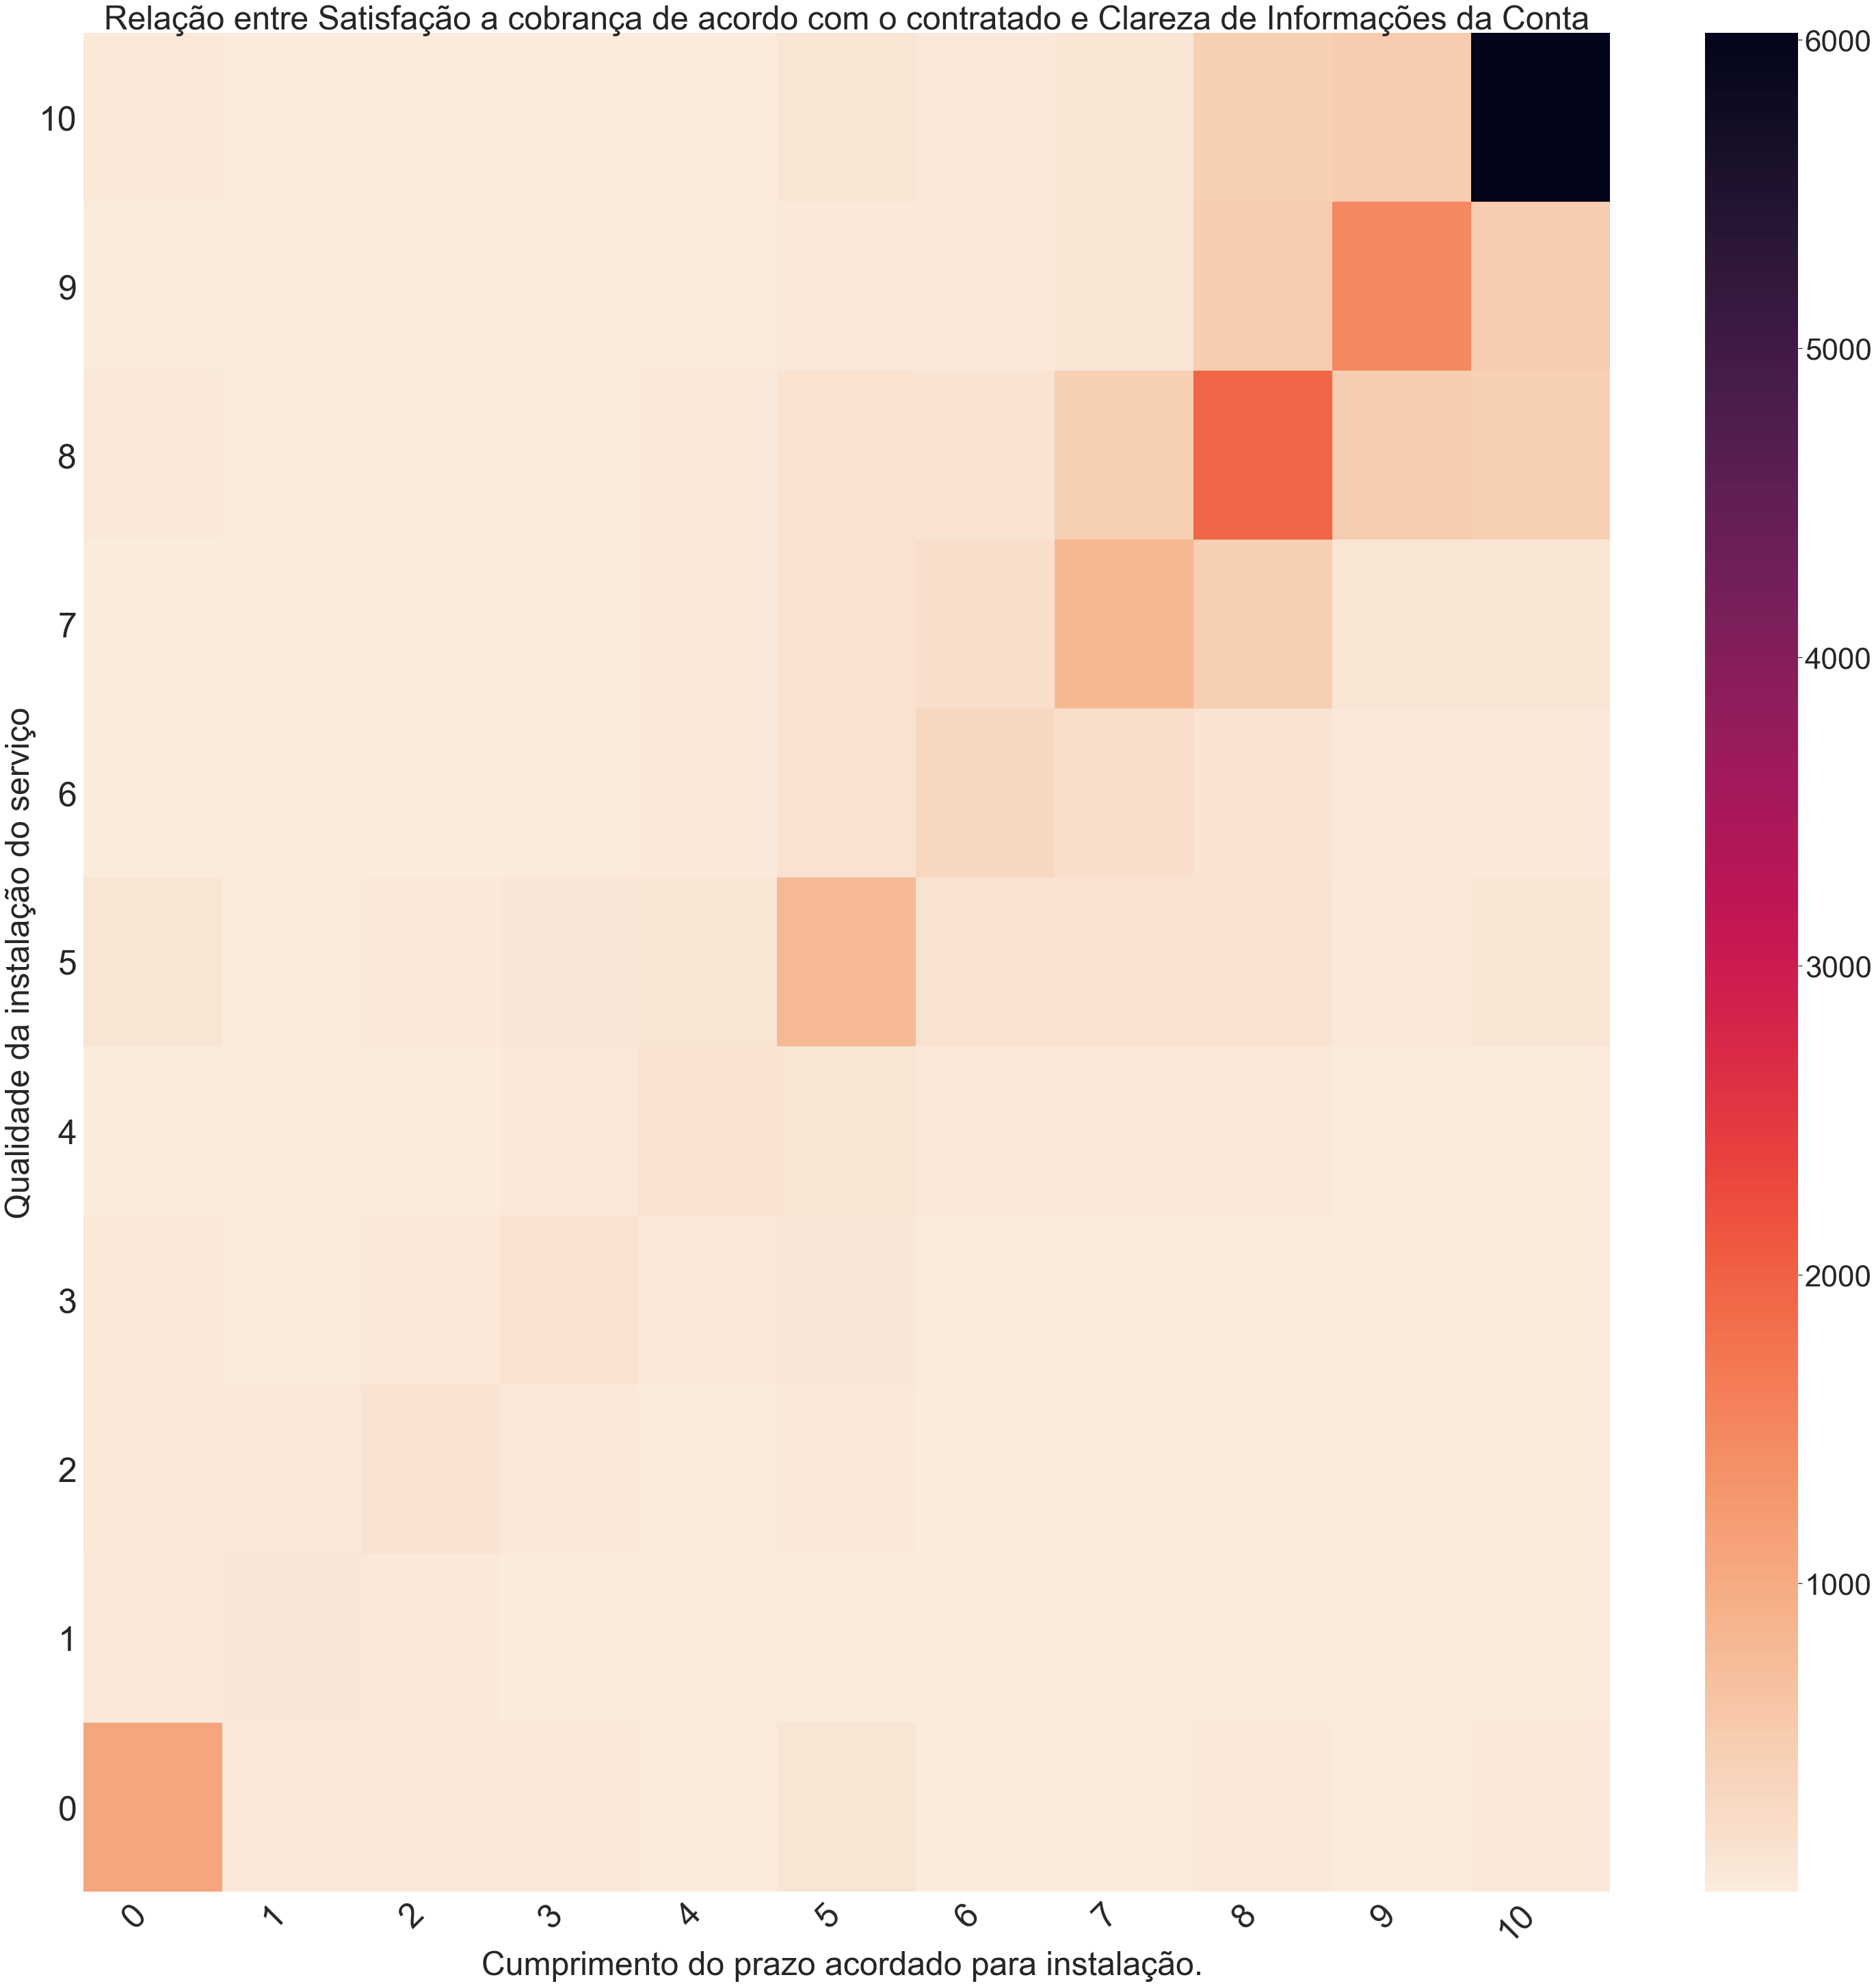

In [24]:
SatQueda= Data_Reshaped["SAT Solicitação de Instalação"]
SatGeral = Data_Reshaped["SAT Prazo Instalação"]

Matrix_Geral_Cobran = np.zeros((11, 11))

for idx in SatGeral.index:
    if (SatGeral.loc[idx] != "nan" and SatQueda.loc[idx] != "nan"):
        j = SatGeral.loc[idx]
        i = SatQueda.loc[idx]

        if ((i <= 10) and (j<=10)):
            i = int(i)
            j = int(j)
            Matrix_Geral_Cobran[j,i] = Matrix_Geral_Cobran[i,j] + 1

Matriz = pd.DataFrame(Matrix_Geral_Cobran)
Matriz = Matriz.sort_index(ascending = False)

f, ax = plt.subplots(figsize=(50, 50))
cmap = sns.color_palette("rocket_r", as_cmap=True)
sns.heatmap(Matriz, cmap=cmap, annot_kws={"fontsize":50})
sns.set(font_scale=4)
plt.title("Relação entre Satisfação a cobrança de acordo com o contratado e Clareza de Informações da Conta")
plt.xlabel("Cumprimento do prazo acordado para instalação. ")
plt.ylabel ("Qualidade da instalação do serviço")
ax.set_xticklabels(
    ax.get_xticklabels(),
    size = 50,
    rotation=45,
    horizontalalignment='right'
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    size = 50,
    rotation=0,
    horizontalalignment='right'
)